**LEVEL 3**

Import Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset

In [11]:
df = pd.read_csv('/content/Dataset 1.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**TASK 1 -Restaurant Reviews(Ratings and Votes Overview)**

Average Aggregate Rating: 2.67
Average Number of Votes: 157

Average Votes per Aggregate Rating:
Aggregate rating
0.0       0.870112
1.8     322.000000
1.9     106.000000
2.0     129.714286
2.1      76.400000
2.2      94.962963
2.3      69.808511
2.4      97.011494
2.5      79.672727
2.6      53.921466
2.7      52.376000
2.8      31.755556
2.9      17.608924
3.0      20.153846
3.1      32.163776
3.2      45.103448
3.3      72.207039
3.4      94.162651
3.5     142.429167
3.6     165.120087
3.7     261.067916
3.8     266.315000
3.9     357.149254
4.0     405.560150
4.1     466.828467
4.2     518.303167
4.3     673.367816
4.4     653.291667
4.5     716.157895
4.6     731.102564
4.7    1089.166667
4.8    1197.880000
4.9     911.967213
Name: Votes, dtype: float64


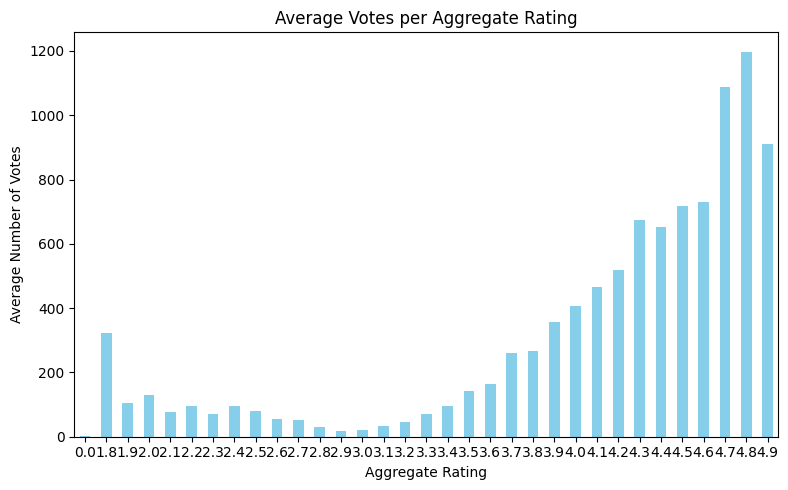

In [12]:
# Drop rows with missing 'Aggregate rating' or 'Votes'
df = df.dropna(subset=['Aggregate rating', 'Votes'])

# Convert Votes to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df = df.dropna(subset=['Votes'])

# Calculate average rating
avg_rating = df['Aggregate rating'].mean()
print(f"Average Aggregate Rating: {avg_rating:.2f}")

# Calculate average votes
avg_votes = df['Votes'].mean()
print(f"Average Number of Votes: {avg_votes:.0f}")

# Group by rating to find average votes per rating
votes_per_rating = df.groupby('Aggregate rating')['Votes'].mean()
print("\nAverage Votes per Aggregate Rating:")
print(votes_per_rating)

# Plot average votes per rating
plt.figure(figsize=(8,5))
votes_per_rating.plot(kind='bar', color='skyblue')
plt.title('Average Votes per Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Number of Votes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**TASK 2: Votes Analysis**

Restaurant with Highest Votes:
Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

Restaurant with Lowest Votes:
Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object

Correlation between Votes and Ratings: 0.31


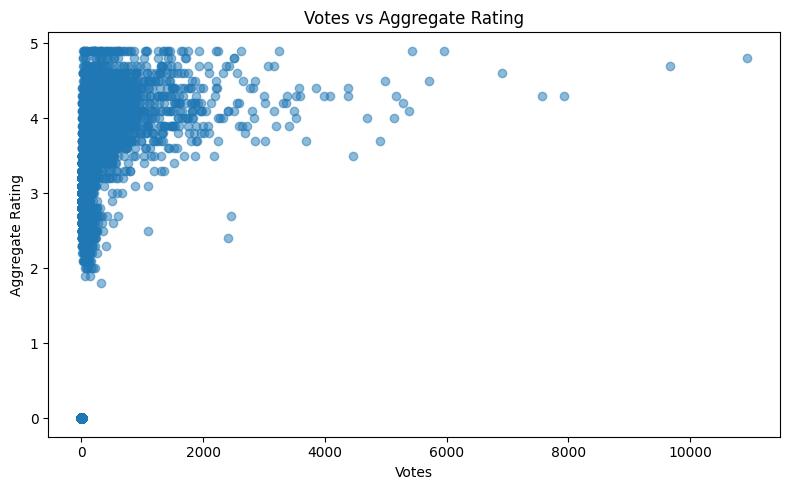

In [13]:
# Drop rows with missing 'Votes' or 'Aggregate rating'
df = df.dropna(subset=['Votes', 'Aggregate rating'])

# Convert Votes to numeric (in case it's string)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df = df.dropna(subset=['Votes'])

# Find restaurants with highest and lowest votes
highest_votes = df.loc[df['Votes'].idxmax()]
lowest_votes = df.loc[df['Votes'].idxmin()]

print("Restaurant with Highest Votes:")
print(highest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])

print("\nRestaurant with Lowest Votes:")
print(lowest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])

# Correlation between Votes and Aggregate rating
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\nCorrelation between Votes and Ratings: {correlation:.2f}")

# Scatter plot Votes vs Ratings
plt.figure(figsize=(8,5))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()

**TASK 3: Price Range vs Online Delivery and Table Booking analysis**

Percentage of Restaurants Offering Online Delivery and Table Booking by Price Range:
             Has Online delivery  Has Table booking
Price range                                        
1                          15.77               0.02
2                          41.31               7.68
3                          29.19              45.74
4                           9.04              46.76


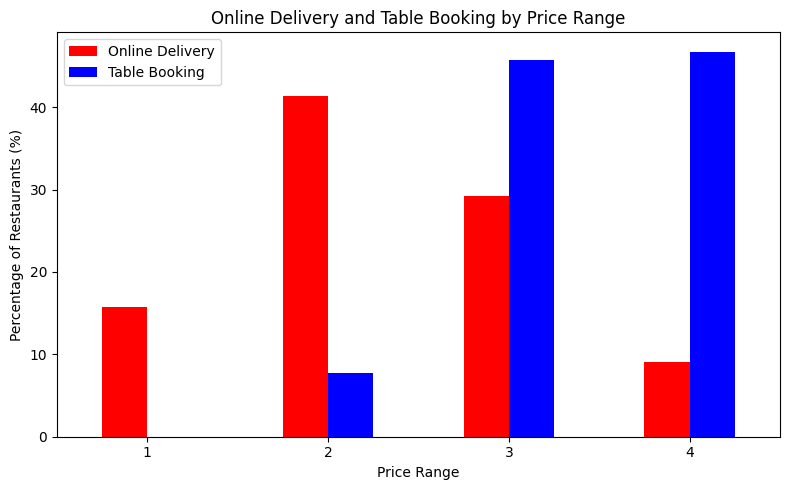

In [14]:
# Drop NA for required columns
df_services = df.dropna(subset=['Price range', 'Has Online delivery', 'Has Table booking']).copy()

# Map Yes/No to boolean
df_services['Has Online delivery'] = df_services['Has Online delivery'].map({'Yes': True, 'No': False})
df_services['Has Table booking'] = df_services['Has Table booking'].map({'Yes': True, 'No': False})

# Group by Price range and calculate mean (percentage)
price_group = df_services.groupby('Price range').agg({
    'Has Online delivery': 'mean',
    'Has Table booking': 'mean'
}) * 100

print("Percentage of Restaurants Offering Online Delivery and Table Booking by Price Range:")
print(price_group.round(2))

# Plot
price_group.plot(kind='bar', figsize=(8,5), color=['red', 'blue'])
plt.title('Online Delivery and Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants (%)')
plt.xticks(rotation=0)
plt.legend(['Online Delivery', 'Table Booking'])
plt.tight_layout()
plt.show()